# Bitcoin Tweets

Data source:

https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets

https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329

# 1. Data Exploration

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import re
import nltk 
import time

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/VVYing/StockerBot/master/Bitcoin_tweets.csv")
df.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers  user_friends  user_favourites  user_verified  \
0            8534          7605             4838          False   
1            6769          1532            25483          False   
2             128           332              924          False   
3             625           129               14          False   
4            1249          1472            10482          False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source  is_retweet  
0                                ['bitcoin']      Twitter Web App       False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android       False  
2                                        NaN      Twitter Web App       False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it       False  
4                                    ['BTC']      Twitter Web App       False

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['user_created'] = pd.to_datetime(df['user_created'])

In [6]:
df['year'] = df['user_created'].dt.year

In [7]:
df.rename(
    columns=({ 'year': 'Reg_year'}), 
    inplace=True,
)
df.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description        user_created  \
0  Biz Consultant, real estate, fintech, startups... 2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf... 2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ... 2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr... 2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I... 2016-02-03 13:15:55   

   user_followers  user_friends  user_favourites  user_verified  \
0            8534          7605             4838          False   
1            6769          1532            25483          False   
2             128           332              924          False   
3             625           129               14          False   
4            1249          1472            10482          False   

                 date                                               text  \
0 2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1 2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2 2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3 2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4 2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source  is_retweet  \
0                                ['bitcoin']      Twitter Web App       False   
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android       False   
2                                        NaN      Twitter Web App       False   
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it       False   
4                                    ['BTC']      Twitter Web App       False   

   Reg_year  
0      2009  
1      2019  
2      2014  
3      2019  
4      2016

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_of_week
df['date'] = df['date'].dt.date
df.head()

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description        user_created  \
0  Biz Consultant, real estate, fintech, startups... 2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf... 2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ... 2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr... 2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I... 2016-02-03 13:15:55   

   user_followers  user_friends  user_favourites  user_verified        date  \
0            8534          7605             4838          False  2021-02-10   
1            6769          1532            25483          False  2021-02-10   
2             128           332              924          False  2021-02-10   
3             625           129               14          False  2021-02-10   
4            1249          1472            10482          False  2021-02-10   

                                                text  \
0  Blue Ridge Bank shares halted by NYSE after #b...   
1  😎 Today, that's this #Thursday, we will do a "...   
2  Guys evening, I have read this article about B...   
3  $BTC A big chance in a billion! Price: \487264...   
4  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source  is_retweet  \
0                                ['bitcoin']      Twitter Web App       False   
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android       False   
2                                        NaN      Twitter Web App       False   
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it       False   
4                                    ['BTC']      Twitter Web App       False   

   Reg_year  year  month  day  hour  day_of_week  
0      2009  2021      2   10    23            2  
1      2019  2021      2   10    23            2  
2      2014  2021      2   10    23            2  
3      2019  2021      2   10    23            2  
4      2016  2021      2   10    23            2

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.describe()

user_followers   user_friends  user_favourites      Reg_year     year  \
count    4.858300e+04   48583.000000     48583.000000  48583.000000  48583.0   
mean     5.703531e+03    1155.908836      6068.639051   2016.830949   2021.0   
std      5.368779e+04    5610.680001     19140.017316      3.664074      0.0   
min      0.000000e+00       0.000000         0.000000   2006.000000   2021.0   
25%      7.400000e+01      45.000000        57.000000   2015.000000   2021.0   
50%      3.930000e+02     221.000000       568.000000   2018.000000   2021.0   
75%      2.151000e+03     822.000000      3855.000000   2020.000000   2021.0   
max      3.977233e+06  701484.000000    488627.000000   2021.000000   2021.0   

              month           day          hour   day_of_week  
count  48583.000000  48583.000000  48583.000000  48583.000000  
mean       2.085215     12.856843     13.211576      2.865611  
std        0.279204      5.598059      6.307080      2.292177  
min        2.000000      5.000000      0.000000      0.000000  
25%        2.000000      8.000000      9.000000      0.000000  
50%        2.000000     12.000000     14.000000      4.000000  
75%        2.000000     15.000000     18.000000      5.000000  
max        3.000000     28.000000     23.000000      6.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48583 entries, 0 to 48582
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         48582 non-null  object        
 1   user_location     28273 non-null  object        
 2   user_description  45263 non-null  object        
 3   user_created      48583 non-null  datetime64[ns]
 4   user_followers    48583 non-null  int64         
 5   user_friends      48583 non-null  int64         
 6   user_favourites   48583 non-null  int64         
 7   user_verified     48583 non-null  bool          
 8   date              48583 non-null  datetime64[ns]
 9   text              48583 non-null  object        
 10  hashtags          38416 non-null  object        
 11  source            47685 non-null  object        
 12  is_retweet        48583 non-null  bool          
 13  Reg_year          48583 non-null  int64         
 14  year              4858

In [12]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  48583
Columns  :  19

Features : 
 ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet', 'Reg_year', 'year', 'month', 'day', 'hour', 'day_of_week']

Missing values :   34696

Unique values :  
 user_name           14067
user_location        4423
user_description    13008
user_created        14046
user_followers       4856
user_friends         3539
user_favourites      7783
user_verified           2
date                   15
text                48345
hashtags            12730
source                228
is_retweet              1
Reg_year               16
year                    1
month                   2
day                    15
hour                   24
day_of_week             7
dtype: int64


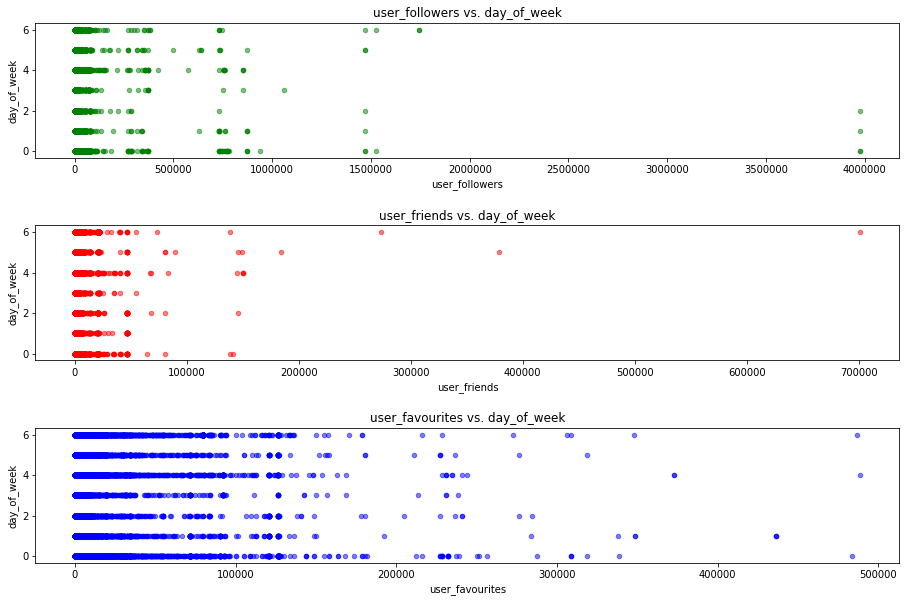

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
df.plot(kind='scatter', x='user_followers', y='day_of_week', alpha=0.5, color='green', ax=axes[0], title="user_followers vs. day_of_week")
df.plot(kind='scatter', x='user_friends', y='day_of_week', alpha=0.5, color='red', ax=axes[1], title="user_friends vs. day_of_week")
df.plot(kind='scatter', x='user_favourites', y='day_of_week', alpha=0.5, color='blue', ax=axes[2], title="user_favourites vs. day_of_week")
plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=2, 
                    wspace=0.5, 
                    hspace=0.5)
plt.show()

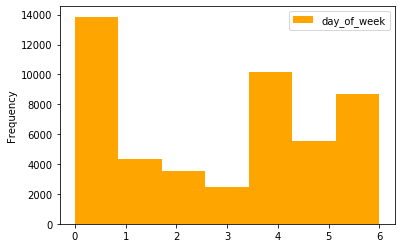

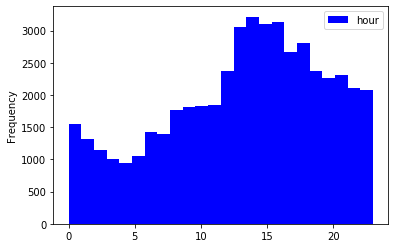

In [13]:
df.plot(kind="hist", y="day_of_week", bins=7, color="orange")
df.plot(kind="hist", y="hour", bins=24, color="blue")
plt.show()

In [15]:
df.to_csv('bt.csv')